<a href="https://colab.research.google.com/github/laracoen/MKLPM/blob/main/RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost scikit-learn pandas -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
!wget https://raw.githubusercontent.com/MKLPM/MKLPM/main/Anotacije.tsv

--2024-06-10 09:02:35--  https://raw.githubusercontent.com/MKLPM/MKLPM/main/Anotacije.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334400 (327K) [text/plain]
Saving to: ‘Anotacije.tsv’

Anotacije.tsv       100%[===================>] 326.56K  --.-KB/s    in 0.1s    

2024-06-10 09:02:36 (2.50 MB/s) - ‘Anotacije.tsv’ saved [334400/334400]



label
neutralno     1238
pozitivno      666
negativno      370
pozitivno      360
mjeå¡ovito     316
Name: count, dtype: int64
Accuracy: 47.97%
F1-Score: 30.97%
                                                   Text Actual-Label  \
2486                                             uzdah.    neutralno   
2836  koliko god shvaÄam genijalnost njegove karakt...   mjeå¡ovito   
2496                           nemojte biti nezahvalni.    neutralno   
1674        ovo je joÅ¡ jedan u nizu odliÄnih romana.    pozitivno    
944        doima se siromaÅ¡nim, previÅ¡e jednostavnim.    negativno   
...                                                 ...          ...   
1933  reÄenice su napisano tako vjeÅ¡to i prekrasno...   pozitivno    
1847  divljan mi je bio prvi lik iz knjige u kojeg s...   pozitivno    
2702  Äak i ako stavim potpuno na stranu svoju odbo...    negativno   
1411  ako iÅ¡ta, sada promatram istanÄane promjene ...    pozitivno   
2858  to bi vjerojatno dosta pomoglo uÄenicima

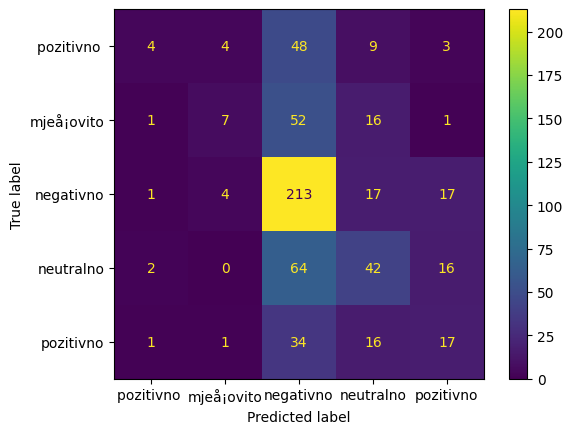

In [ ]:
!pip install xgboost scikit-learn pandas -U

import pandas as pd

# Reading and preprocessing the data
df = pd.read_csv('https://raw.githubusercontent.com/MKLPM/MKLPM/main/Anotacije.tsv', encoding="ISO-8859-1", delimiter='\t')
df.columns = ['text', 'label']  # Renaming columns if necessary

# Lower-casing the labels
df['label'] = df['label'].str.lower()

# Label distribution
print(df["label"].value_counts())

# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

texts_train, texts_test, labels_train, labels_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Train the RandomForestClassifier model
model_rfc = RandomForestClassifier(n_estimators=100)
model_rfc.fit(X_train, labels_train)

# Make predictions on the test set
predictions_rfc = model_rfc.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(labels_test, predictions_rfc)
print("Accuracy: {:.2f}%".format(accuracy * 100))
f1 = f1_score(labels_test, predictions_rfc, average='macro')
print("F1-Score: {:.2f}%".format(f1 * 100))

# Plotting confusion matrix
cm = confusion_matrix(labels_test, predictions_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=set(labels_test))
disp.plot()

# Analyzing the errors
data = {'Text': texts_test, 'Actual-Label': labels_test, 'Predicted-Label': predictions_rfc}
df_errors = pd.DataFrame(data)
print(df_errors[df_errors["Actual-Label"] != df_errors['Predicted-Label']])
